In [1]:
%matplotlib widget

In [2]:
import sys
sys.path.append('..')

import numpy as np
import matplotlib.pyplot as plt
from tqdm.auto import tqdm

from seismicpro.src import Survey, MetricMap
from seismicpro.src.static_correction import StaticCorrection
from seismicpro.src.weathering_velocity import WeatheringVelocityInterpolator

In [3]:
path = '/data/H5_LB/BL10_flat2.sgy'
path_fp = '/data/H5_LB/BL10_fbp_2branc'
survey = Survey(path, header_index=['INLINE_3D', 'CROSSLINE_3D'], name='raw', header_cols='all')
survey = survey.load_first_breaks(path_fp)

/notebooks/anton/geolog/pull_requests/statics/SeismicPro/examples/../seismicpro/src/survey/survey.py:125: RuntimeWarning: An automatically reconstructed TRACE_SEQUENCE_FILE header will be used instead of the one, contained in BL10_flat2
  warnings.warn(warn_msg, RuntimeWarning)


In [4]:
sp_params = {"size": (11, 11),
             "step": (20, 40),
             "modulo": (1, 0)}
weathering_velocity = 0.8
wv_kwargs = {'n_layers': 2, 'bounds': {'v1':[1.3, 1.7], 'v2': [1.81, 3.]}}

In [5]:
interp = WeatheringVelocityInterpolator().from_supergathers(survey, sp_params, 'FirstBreak', weathering_velocity, wv_kwargs)

  0%|          | 0/298 [00:00<?, ?it/s]

In [6]:
survey.calculate_static_correction_params('FirstBreak', interp)

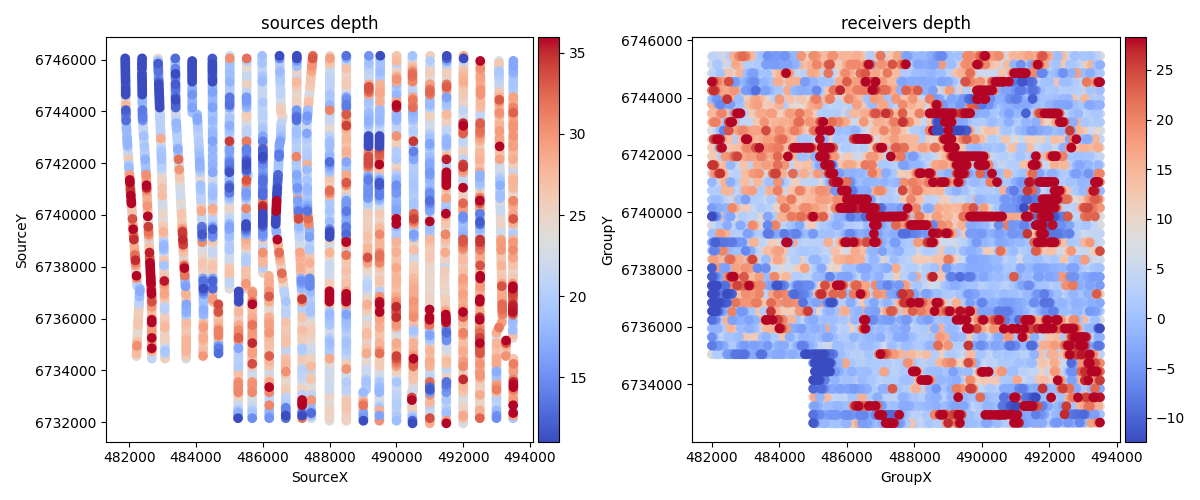

In [7]:
survey.static_corr.plot_depths(1)

In [9]:
fr_survey = survey.reindex('FieldRecord')

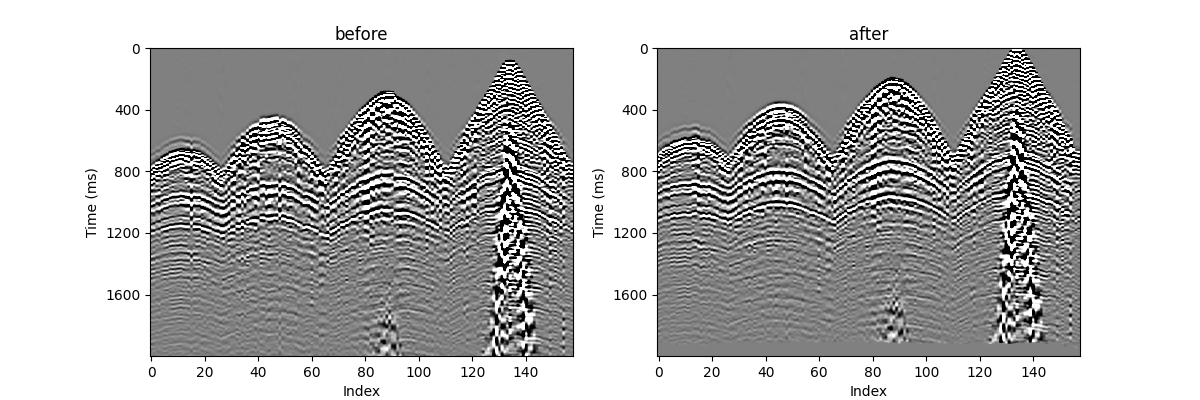

In [23]:
g = fr_survey.sample_gather()
_, ax = plt.subplots(1, 2, figsize=(12, 4))
g.plot(ax=ax[0], title='before')
gstat = g.copy()
gstat.apply_static_correciton(datum=0)
gstat.plot(ax=ax[1], title='after')